In [1]:
from SLGCA_Model import SLGCA
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
import numpy as np
import warnings
from preprecess import *
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
os.environ['R_HOME'] = '/home/luxin1/miniconda3/envs/pytorch/lib/R'
BASE_PATH = "/home/luxin1/ST-DATA/BRCA/"
n_clusters =11
file_fold = BASE_PATH

In [4]:
adata = sc.read_visium(file_fold, count_file='V1_Breast_Cancer_Block_A_Section_1_filtered_feature_bc_matrix.h5', load_images=True)
adata.var_names_make_unique()
df_meta = pd.read_csv(file_fold + "/clusters.csv", sep=",")
# print(df_meta.columns) 
de_meta_layer = df_meta['Cluster']
adata.obs['ground_truth'] = de_meta_layer.values
adata = adata[~pd.isnull(adata.obs['ground_truth'])]

In [5]:
model = SLGCA(adata = adata,device=device, epochs=500,dim_output=256, n_top_genes=3000, n_neighbors=4,alpha=10,beta=0.6,gama=0.7)
adata = model.train()

from utils import clustering
tool = 'mclust'
radius = 50
clustering(adata, n_clusters=n_clusters, method=tool, radius=radius, refinement=True)
ARI = metrics.adjusted_rand_score(adata.obs['SLGCA'], adata.obs['ground_truth'])
NMI = metrics.normalized_mutual_info_score(adata.obs['SLGCA'], adata.obs['ground_truth'])
print(ARI, NMI)

Begin to train ST data...


100%|██████████| 500/500 [00:44<00:00, 11.21it/s]


Optimization finished for ST data!


R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%
0.4635598977842679 0.59141191755974


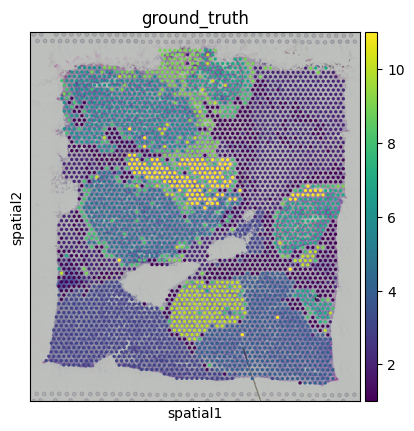

In [7]:
sc.pl.spatial(adata, color=['ground_truth'])

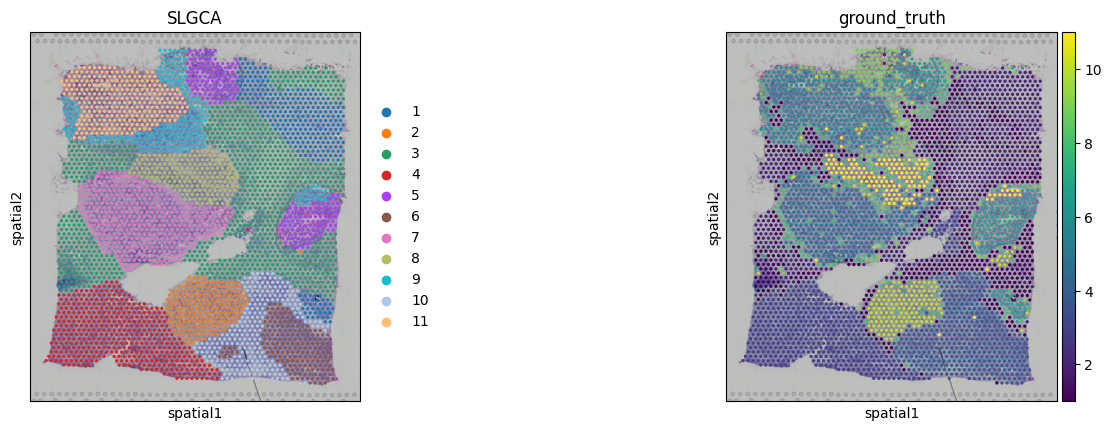

In [6]:
sc.pl.spatial(adata, color=['SLGCA', 'ground_truth'])